In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dfs= pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
dfs.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dfs.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
dfs.shape

(299, 13)

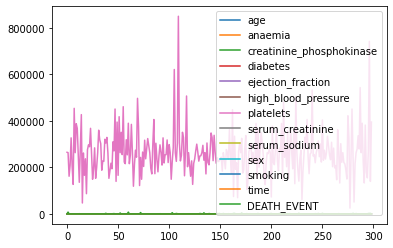

In [ ]:
dfs.plot()

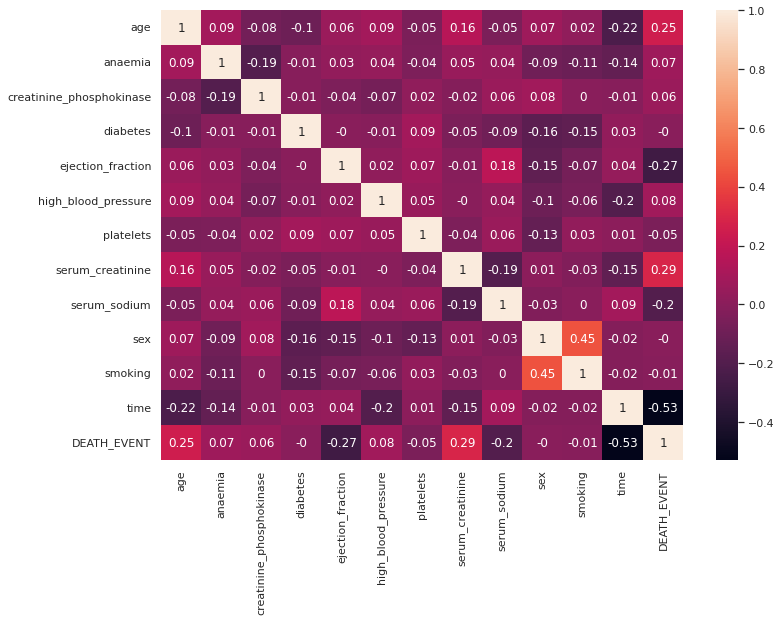

In [ ]:
correlation_matrix = dfs.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
from sklearn.model_selection import train_test_split

y = dfs['DEATH_EVENT'].copy()
X = dfs.drop('DEATH_EVENT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[58  6]
 [15 11]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        64
           1       0.65      0.42      0.51        26

    accuracy                           0.77        90
   macro avg       0.72      0.66      0.68        90
weighted avg       0.75      0.77      0.75        90

0.7666666666666667


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:


y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[63  1]
 [26  0]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        64
           1       0.00      0.00      0.00        26

    accuracy                           0.70        90
   macro avg       0.35      0.49      0.41        90
weighted avg       0.50      0.70      0.59        90

0.7


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[64  0]
 [26  0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        64
           1       0.00      0.00      0.00        26

    accuracy                           0.71        90
   macro avg       0.36      0.50      0.42        90
weighted avg       0.51      0.71      0.59        90

0.7111111111111111


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[53 11]
 [18  8]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        64
           1       0.42      0.31      0.36        26

    accuracy                           0.68        90
   macro avg       0.58      0.57      0.57        90
weighted avg       0.65      0.68      0.66        90

0.6777777777777778


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification accuracy without scaling: 0.8111


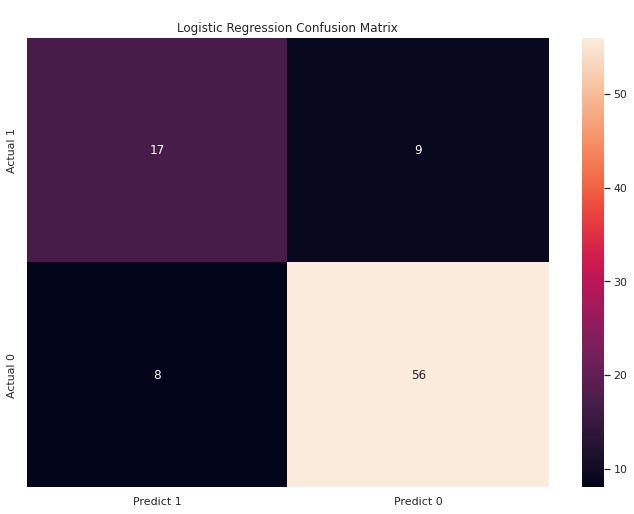

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=metrics.confusion_matrix(y_test, log_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
 columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nLogistic Regression Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy without scaling: {0:0.4f}'.format(classification_accuracy))

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)


Classification accuracy without scaling: 0.8444


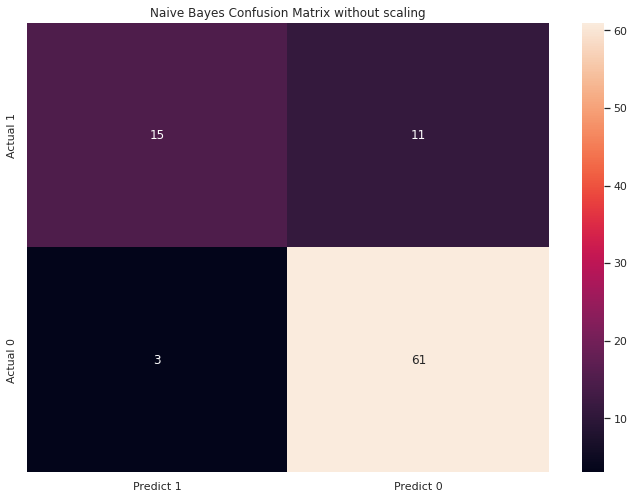

In [ ]:
cm = metrics.confusion_matrix(y_test, gnb_pred, labels=[ 1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
 columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Naive Bayes Confusion Matrix without scaling')
sns.heatmap(df_cm, annot=True, fmt='g');

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy without scaling: {0:0.4f}'.format(classification_accuracy))


KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
numberList = list(range(1,17))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList))


Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15]

Accuracy Score : 
 [0.5222222222222223, 0.5444444444444444, 0.6111111111111112, 0.6333333333333333, 0.6555555555555556, 0.6444444444444445, 0.6555555555555556, 0.6777777777777778]

Misclassification error :
 [0.47777777777777775, 0.4555555555555556, 0.38888888888888884, 0.3666666666666667, 0.34444444444444444, 0.3555555555555555, 0.34444444444444444, 0.3222222222222222]

The optimal number of neighbor is k= 15


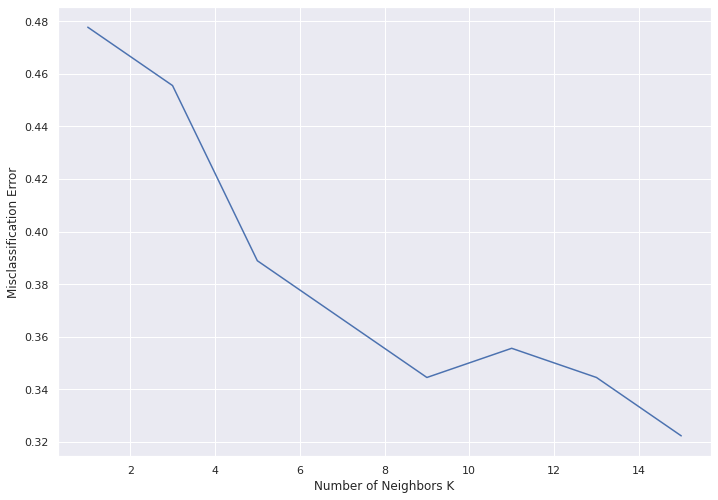

In [ ]:
ac_scores = []

for k in neighbors:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train.values.ravel())
 y_pred = knn.predict(X_test)
 scores = accuracy_score(y_test, y_pred)
 ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)


Classification accuracy: 0.6778


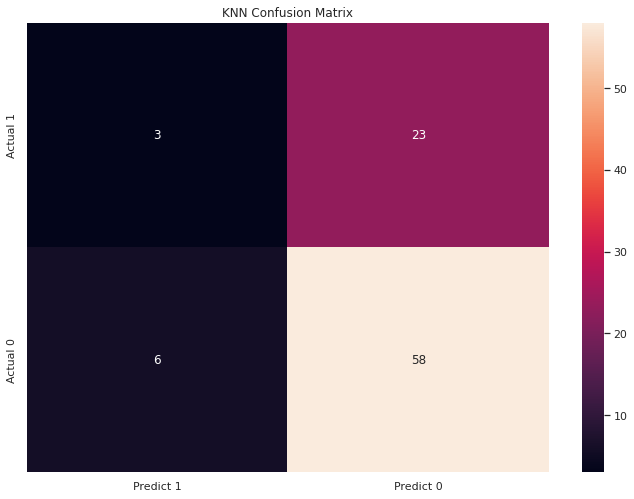

In [ ]:
cm=metrics.confusion_matrix(y_test, knn_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
 columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('KNN Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Decision Tree Classifier

In [ ]:


from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier(criterion='entropy',random_state=3)
dTree.fit(X_train,y_train)

print('test score', dTree.score(X_test,y_test))


test score 0.7888888888888889


Random Forest Classifier

In [ ]:


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8889


In [ ]:

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8889


In [ ]:
from sklearn. ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn. ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Bagging Classifier

Accuracy :  0.83
Precision :  0.83
Recall :  0.83
F1 score :  0.83


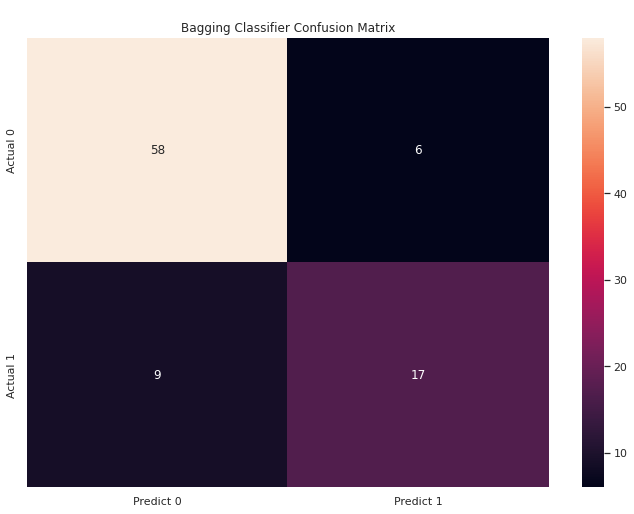

In [ ]:
dTree= DecisionTreeClassifier(criterion = 'gini', random_state=1)
bgcl= BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=1, max_samples=.7)
bgcl=bgcl.fit(X_train, y_train)
bgcl_y_predict = bgcl.predict(X_test)
misclassified_count = (y_test != bgcl_y_predict).sum()



cm=metrics.confusion_matrix(y_test, bgcl_y_predict, labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 0","Actual 1"]],

columns= [i for i in ["Predict 0", "Predict 1"]])

plt.title('\nBagging Classifier Confusion Matrix')

sns.heatmap(df_cm, annot=True, fmt='g');

a = accuracy_score (y_test, bgcl_y_predict)

p = precision_score(y_test, bgcl_y_predict,average='micro')

r = recall_score(y_test, bgcl_y_predict,average='micro')

f = f1_score(y_test, bgcl_y_predict,average='micro')

print("Accuracy : ",round (a,2))

print("Precision : ",round(p,2))

print("Recall : ", round(r,2))

print("F1 score : ",round (f,2))

Gradient Boost Classifier


Misclassified samples in Gradient Boost: 12
Accuracy :  0.87
Precision : :  0.83
Recall :  0.85
F1 score :  0.84


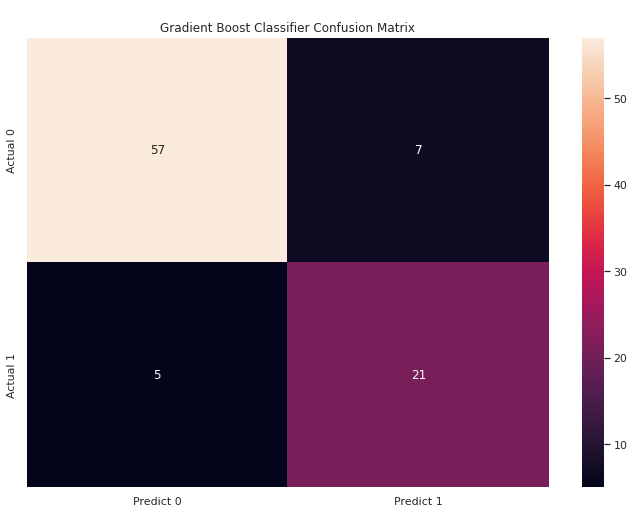

In [ ]:
gbcl = GradientBoostingClassifier (n_estimators = 75, random_state=1, learning_rate= 0.7)

gbcl= gbcl.fit(X_train, y_train)
gbcl_y_predict = gbcl.predict(X_test)


misclassified_count = (y_test != gbcl_y_predict).sum()
print("\nMisclassified samples in Gradient Boost:", misclassified_count)


cm=metrics.confusion_matrix (y_test, gbcl_y_predict, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 0","Actual 1"]],
columns = [i for i in ["Predict 0", "Predict 1"]])

plt.title('\nGradient Boost Classifier Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');


a = accuracy_score (y_test, gbcl_y_predict)
p = precision_score (y_test, gbcl_y_predict,average='macro')
r = recall_score (y_test, gbcl_y_predict,average='macro')
f = f1_score (y_test, gbcl_y_predict,average='macro')

print("Accuracy : ",round (a,2))
print("Precision : : ",round (p,2))
print("Recall : ", round(r,2))
print("F1 score : ", round(f,2))

Adaboost Classifier


Misclassified samples in Adaboost:  16
Accuracy :  0.8222


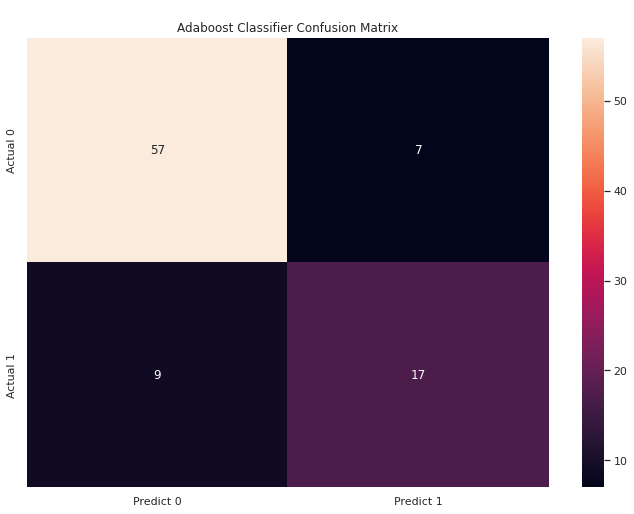

In [ ]:
abc1 = AdaBoostClassifier(n_estimators=10, random_state=1)

abc1 = abc1.fit(X_train, y_train)

abc1_y_predict = abc1.predict(X_test)



misclassified_count = (y_test != abc1_y_predict).sum()
print('\nMisclassified samples in Adaboost: ', misclassified_count)



cm=metrics.confusion_matrix (y_test, abc1_y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 0", "Actual 1"]],
columns = [i for i in ["Predict 0","Predict 1"]])
plt.title('\nAdaboost Classifier Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

a = accuracy_score (y_test, abc1_y_predict)

print("Accuracy : ",round (a,4))

